In [1]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from collections import Counter

2023-04-26 05:09:02.126458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 05:09:02.349573: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 05:09:03.341299: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mbmk92/anaconda3/envs/dltest/lib/
2023-04-26 05:09:03.341813: W tensorflow/compiler/xla/str

# How does SMOTE work ?

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, weights=[0.2, 0.8], class_sep=0.95, random_state=0)

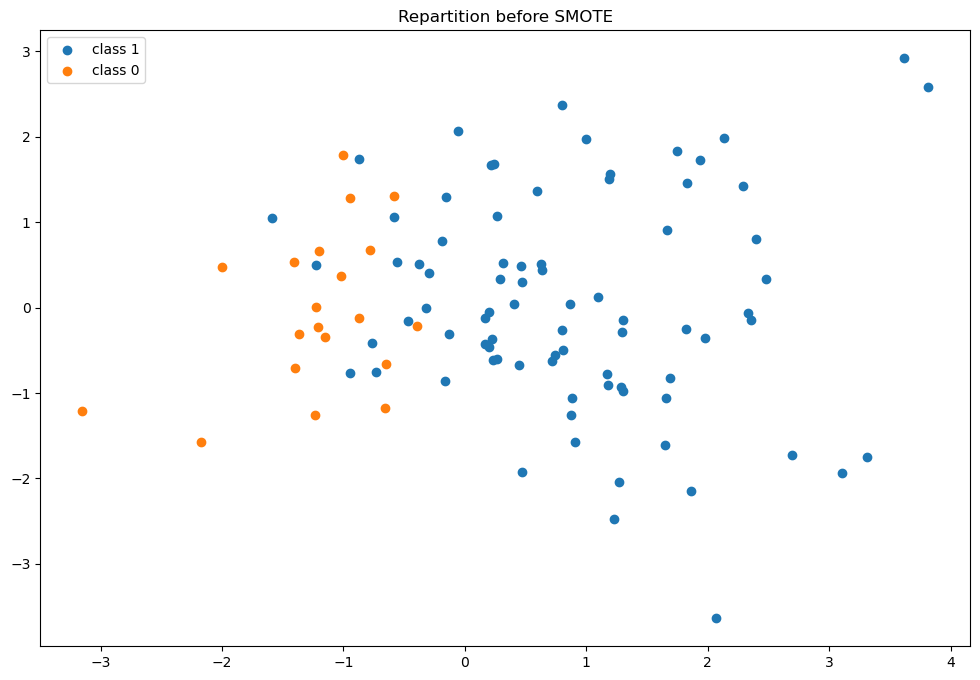

In [5]:
plt.figure(figsize=(12, 8))
plt.title('Repartition before SMOTE')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='class 1')
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='class 0')
plt.legend()
plt.grid(False)
plt.show()

In [6]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

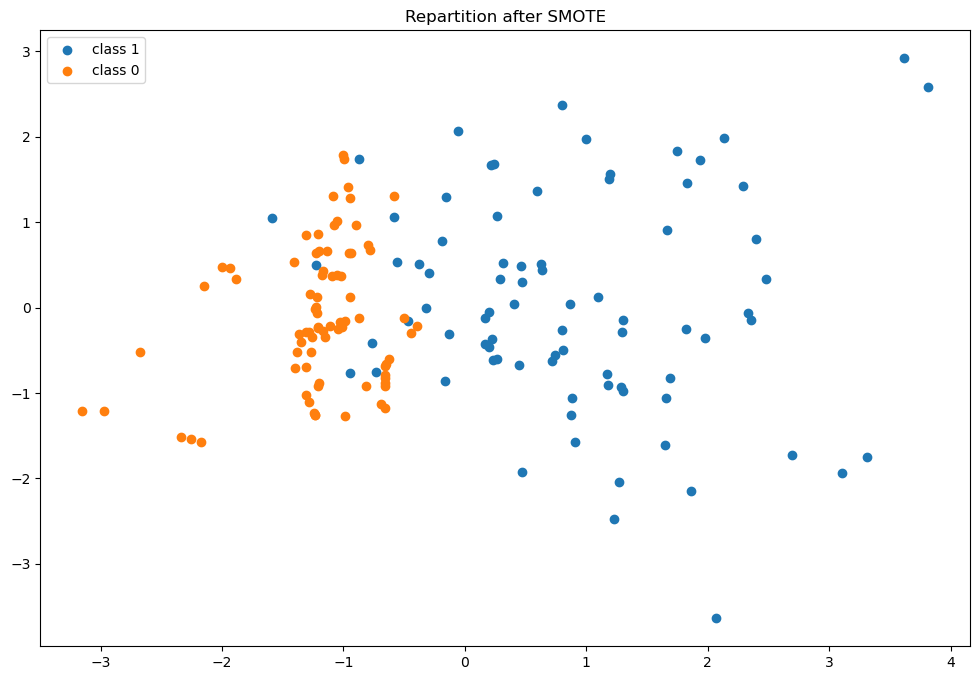

In [7]:
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='class 1')
plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='class 0')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
df = pd.read_csv("../input/train.csv")
print("Number of texts: ", df.shape[0])

# Loading data

In [19]:
df = pd.read_csv("training_set.csv")
print("Number of texts: ", df.shape[0])

Number of texts:  2047


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2047 non-null   int64 
 1   transcript  2047 non-null   object
 2   label       2047 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.1+ KB


# Class imbalance

In [26]:
def plot_class_distribution(data, title):
    sns.set(style="darkgrid")
    ax = sns.countplot(x='label', data=data)
    ax.set_title(title)
    
    # Annotate the bars with the number of samples
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    plt.show()

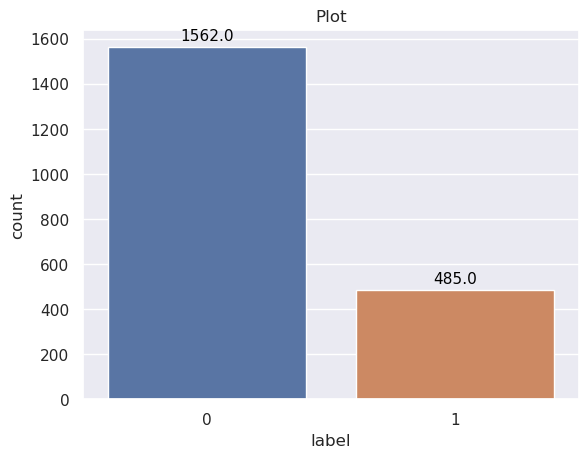

In [27]:
plot_class_distribution(df, title="Plot")

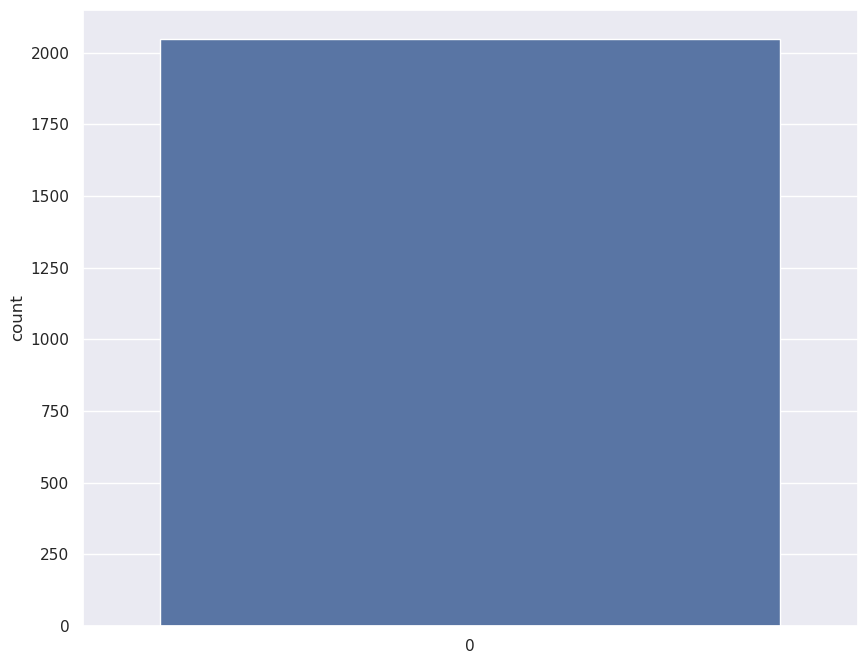

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(df['label'])
plt.show()

In [38]:
print(Counter(df['label']))

Counter({0: 1562, 1: 485})


In [ ]:
df_example = df[['id', 'transcript', 'label']]
sns.scatterplot(data = df, x ='id', y = 'transcript', hue = 'label')

<Axes: xlabel='id', ylabel='transcript'>

/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  func(*args, **kwargs)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  func(*args, **kwargs)
/home/mbmk92/anaconda3/envs/dltest/li

Error in callback <function _draw_all_if_interactive at 0x7f70589d6200> (for post_execute):



KeyboardInterrupt

/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mbmk92/anaconda3/envs/dltest/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 

Error in callback <function flush_figures at 0x7f7054566950> (for post_execute):



KeyboardInterrupt



# Making Data for the network

In [39]:
max_len = 50
len_voc = 40000

## Train/Test split

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.5)

In [ ]:
## 